INTERN FEEDBACK SENTIMENT ANALYSIS

STEP 1: Creating Sample Feedback Data
----------------------------------------
Created 200 feedback samples

Sample feedback:
- I really appreciated the learning opportunities and found it amazing.
- The learning opportunities was acceptable but could be better.
- The work environment was disappointing and affected my experience.
- The feedback system was okay but has room for improvement.
- The projects exceeded my expectations and was great.


STEP 2: Text Preprocessing
----------------------------------------
Text preprocessing completed!

Example:
Original: I really appreciated the learning opportunities and found it amazing.
Cleaned:  i really appreciated the learning opportunities and found it amazing


STEP 3: Automatic Sentiment Labeling
----------------------------------------
Sentiment Distribution:
sentiment
positive    145
negative     50
neutral       5
Name: count, dtype: int64


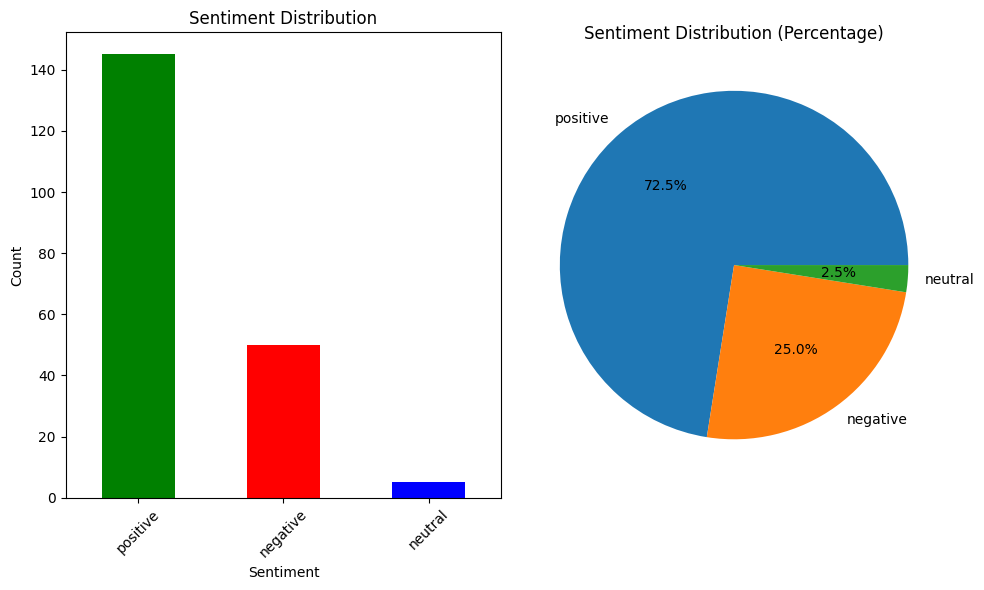



STEP 4: Preparing Data for Machine Learning
----------------------------------------
Converting text to numerical features using TF-IDF...
Text converted to 200 samples with 210 features
Label encoding: {'negative': 0, 'neutral': 1, 'positive': 2}


STEP 5: Splitting Data
----------------------------------------
Training samples: 160
Testing samples: 40


STEP 6: Training Logistic Regression Model
----------------------------------------
Model Accuracy: 97.50%


STEP 7: Model Performance Evaluation
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        10
     neutral       0.00      0.00      0.00         1
    positive       0.97      1.00      0.98        29

    accuracy                           0.97        40
   macro avg       0.66      0.67      0.66        40
weighted avg       0.95      0.97      0.96        40



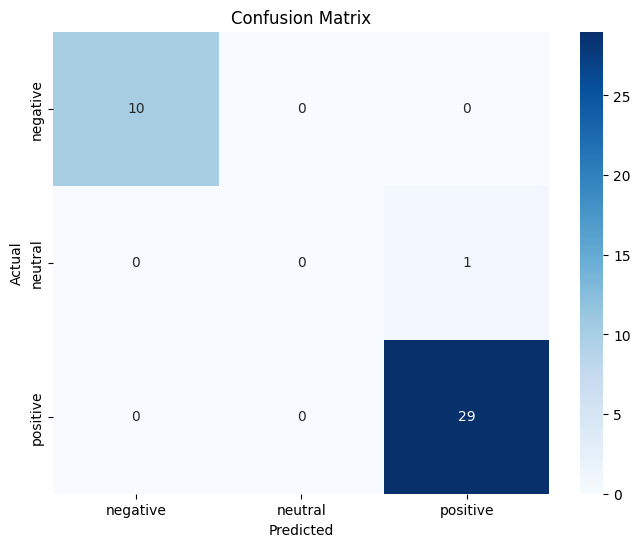



STEP 8: Identifying Key Words for Each Sentiment
----------------------------------------
Top words for each sentiment:

NEGATIVE sentiment keywords:
  - frustrating: 1.672
  - disappointed: 1.256
  - terrible: 1.154
  - disappointing: 0.708
  - needs improvement: 0.561
  - needs: 0.561
  - poor: 0.561
  - terrible needs: 0.475
  - opportunities terrible: 0.462
  - awful: 0.442

NEUTRAL sentiment keywords:
  - inadequate: 1.073
  - inadequate needs: 0.725
  - inadequate affected: 0.668
  - environment inadequate: 0.585
  - projects inadequate: 0.432
  - experience: 0.408
  - affected experience: 0.408
  - affected: 0.408
  - collaboration inadequate: 0.394
  - needs: 0.367

POSITIVE sentiment keywords:
  - special: 0.674
  - average: 0.674
  - average special: 0.674
  - acceptable better: 0.570
  - better: 0.570
  - acceptable: 0.570
  - really: 0.522
  - really appreciated: 0.522
  - appreciated: 0.522
  - room improvement: 0.495


STEP 9: Analyzing Feedback by Categories
----------

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("INTERN FEEDBACK SENTIMENT ANALYSIS")
print("="*60)


print("\nSTEP 1: Creating Sample Feedback Data")
print("-" * 40)

feedback_data = {
    'intern_id': [f'INTERN_{i:03d}' for i in range(1, 201)],
    'feedback_text': [
        # Positive feedback examples
        "Great mentorship program! I learned so much about web development.",
        "The training sessions were very helpful and well-structured.",
        "I loved working on real projects and getting hands-on experience.",
        "My supervisor was supportive and gave excellent guidance.",
        "The work environment is collaborative and friendly.",
        "Amazing opportunity to work with cutting-edge technology.",
        "I feel valued and my contributions are recognized.",
        "The team is very welcoming and inclusive.",
        "Great learning curve and professional development.",
        "I enjoyed the flexible working hours and remote options.",

        # Negative feedback examples
        "The workload was overwhelming and stressful.",
        "Lack of proper guidance from supervisors.",
        "The office environment is too noisy and distracting.",
        "Not enough learning opportunities provided.",
        "Poor communication between team members.",
        "The internship didn't meet my expectations.",
        "I felt isolated and didn't get enough support.",
        "The tasks were repetitive and boring.",
        "No clear career progression path discussed.",
        "The feedback process was inconsistent.",

        # Neutral feedback examples
        "The internship was okay, average experience overall.",
        "Some aspects were good, others could be improved.",
        "It was a decent learning experience.",
        "The program has both strengths and weaknesses.",
        "Mixed feelings about the overall experience.",
    ] * 8
}


positive_templates = [
    "I really appreciated the {aspect} and found it {positive_adj}.",
    "The {aspect} was {positive_adj} and helped me grow professionally.",
    "I'm grateful for the {aspect} which was truly {positive_adj}.",
    "The {aspect} exceeded my expectations and was {positive_adj}.",
]

negative_templates = [
    "The {aspect} was {negative_adj} and needs improvement.",
    "I found the {aspect} to be {negative_adj} and frustrating.",
    "The {aspect} was {negative_adj} and affected my experience.",
    "I was disappointed with the {aspect} as it was {negative_adj}.",
]

neutral_templates = [
    "The {aspect} was acceptable but could be better.",
    "The {aspect} was average, nothing special.",
    "The {aspect} was okay but has room for improvement.",
]

aspects = ['training', 'mentorship', 'work environment', 'projects', 'team collaboration',
           'feedback system', 'learning opportunities', 'work-life balance']
positive_adj = ['excellent', 'outstanding', 'amazing', 'fantastic', 'wonderful', 'great']
negative_adj = ['poor', 'terrible', 'disappointing', 'inadequate', 'frustrating', 'awful']


np.random.seed(42)
extended_feedback = []
extended_ids = []

for i in range(200):
    intern_id = f'INTERN_{i+1:03d}'

    # 40% positive, 30% negative, 30% neutral
    sentiment_type = np.random.choice(['positive', 'negative', 'neutral'],
                                    p=[0.4, 0.3, 0.3])

    if sentiment_type == 'positive':
        template = np.random.choice(positive_templates)
        aspect = np.random.choice(aspects)
        adj = np.random.choice(positive_adj)
        feedback = template.format(aspect=aspect, positive_adj=adj)
    elif sentiment_type == 'negative':
        template = np.random.choice(negative_templates)
        aspect = np.random.choice(aspects)
        adj = np.random.choice(negative_adj)
        feedback = template.format(aspect=aspect, negative_adj=adj)
    else:
        template = np.random.choice(neutral_templates)
        aspect = np.random.choice(aspects)
        feedback = template.format(aspect=aspect)

    extended_feedback.append(feedback)
    extended_ids.append(intern_id)


df = pd.DataFrame({
    'intern_id': extended_ids,
    'feedback_text': extended_feedback
})

print(f"Created {len(df)} feedback samples")
print("\nSample feedback:")
for i in range(5):
    print(f"- {df.iloc[i]['feedback_text']}")


print("\n\nSTEP 2: Text Preprocessing")
print("-" * 40)

def clean_text(text):
    """Simple text cleaning function"""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    return text

df['cleaned_text'] = df['feedback_text'].apply(clean_text)

print("Text preprocessing completed!")
print("\nExample:")
print(f"Original: {df.iloc[0]['feedback_text']}")
print(f"Cleaned:  {df.iloc[0]['cleaned_text']}")


print("\n\nSTEP 3: Automatic Sentiment Labeling")
print("-" * 40)

def get_sentiment_label(text):
    """Get sentiment label using TextBlob"""
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['feedback_text'].apply(get_sentiment_label)

# Show sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution (Percentage)')

plt.tight_layout()
plt.show()

# STEP 4: PREPARE DATA FOR MACHINE LEARNING
# =========================================
print("\n\nSTEP 4: Preparing Data for Machine Learning")
print("-" * 40)

# Convert text to numerical features using TF-IDF
print("Converting text to numerical features using TF-IDF...")

# TF-IDF Vectorizer (converts text to numbers)
tfidf = TfidfVectorizer(
    max_features=1000,  # Use top 1000 words
    stop_words='english',  # Remove common words like 'the', 'and'
    ngram_range=(1, 2)  # Use single words and word pairs
)

# Fit and transform the text data
X = tfidf.fit_transform(df['cleaned_text'])
y = df['sentiment']

print(f"Text converted to {X.shape[0]} samples with {X.shape[1]} features")

# Encode labels to numbers (positive=2, neutral=1, negative=0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Label encoding: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

# STEP 5: SPLIT DATA INTO TRAINING AND TESTING
# ============================================
print("\n\nSTEP 5: Splitting Data")
print("-" * 40)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# STEP 6: TRAIN LOGISTIC REGRESSION MODEL
# =======================================
print("\n\nSTEP 6: Training Logistic Regression Model")
print("-" * 40)

# Create and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# STEP 7: EVALUATE MODEL PERFORMANCE
# =================================
print("\n\nSTEP 7: Model Performance Evaluation")
print("-" * 40)

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# STEP 8: IDENTIFY KEY WORDS FOR EACH SENTIMENT
# =============================================
print("\n\nSTEP 8: Identifying Key Words for Each Sentiment")
print("-" * 40)

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Get the most important words for each sentiment
def get_top_words(sentiment_class, n_words=10):
    """Get top words that indicate a specific sentiment"""
    coef = model.coef_[sentiment_class]
    top_indices = coef.argsort()[-n_words:][::-1]
    return [(feature_names[i], coef[i]) for i in top_indices]

print("Top words for each sentiment:")
for i, sentiment in enumerate(label_encoder.classes_):
    print(f"\n{sentiment.upper()} sentiment keywords:")
    top_words = get_top_words(i, 10)
    for word, score in top_words:
        print(f"  - {word}: {score:.3f}")


print("\n\nSTEP 9: Analyzing Feedback by Categories")
print("-" * 40)

# Group feedback by sentiment and extract common themes
def extract_themes(sentiment_type):
    """Extract common themes from feedback of a specific sentiment"""
    subset = df[df['sentiment'] == sentiment_type]['feedback_text'].tolist()

    # Find common words (simple approach)
    all_words = []
    for text in subset:
        words = clean_text(text).split()
        all_words.extend(words)

    # Get most common words
    word_counts = Counter(all_words)
    common_words = [word for word, count in word_counts.most_common(10)
                   if word not in ['the', 'and', 'was', 'is', 'it', 'to', 'of', 'a', 'in', 'for']]

    return common_words[:5]

print("Common themes by sentiment:")
for sentiment in ['positive', 'negative', 'neutral']:
    themes = extract_themes(sentiment)
    print(f"\n{sentiment.upper()} feedback themes:")
    for theme in themes:
        print(f"  - {theme}")


print("\n\nSTEP 10: Recommendations for Improvement")
print("-" * 40)


negative_feedback = df[df['sentiment'] == 'negative']['feedback_text'].tolist()

print("Areas for improvement based on negative feedback:")
improvement_areas = {
    'mentorship': ['guidance', 'supervisor', 'support', 'mentor'],
    'workload': ['overwhelming', 'stressful', 'workload', 'pressure'],
    'environment': ['environment', 'noisy', 'distracting', 'office'],
    'learning': ['learning', 'opportunities', 'training', 'development'],
    'communication': ['communication', 'feedback', 'isolated', 'team']
}

for area, keywords in improvement_areas.items():
    count = 0
    for feedback in negative_feedback:
        if any(keyword in feedback.lower() for keyword in keywords):
            count += 1

    if count > 0:
        percentage = (count / len(negative_feedback)) * 100
        print(f"  - {area.title()}: {count} mentions ({percentage:.1f}% of negative feedback)")


print("\n\nSTEP 11: Function to Predict New Feedback")
print("-" * 40)

def predict_sentiment(new_feedback):
    """Predict sentiment of new feedback text"""

    cleaned = clean_text(new_feedback)


    features = tfidf.transform([cleaned])

    prediction = model.predict(features)[0]
    confidence = model.predict_proba(features)[0].max()

    sentiment_label = label_encoder.inverse_transform([prediction])[0]

    return sentiment_label, confidence

# Test the function
print("Testing sentiment prediction on new feedback:")
test_feedback = [
    "The mentorship program was absolutely fantastic and I learned so much!",
    "The workload was too much and I didn't get enough support from my supervisor.",
    "The internship was okay, nothing special but not bad either."
]

for i, feedback in enumerate(test_feedback, 1):
    sentiment, confidence = predict_sentiment(feedback)
    print(f"\nTest {i}: {feedback}")
    print(f"Predicted sentiment: {sentiment} (confidence: {confidence:.2%})")

